In [36]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [38]:
df = pd.read_csv('spam.csv')
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


# data analysis

In [39]:
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


> if 75% percentile is largely different from the max, it is a good indication of outlier

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ead882350>,
      dtype=object)

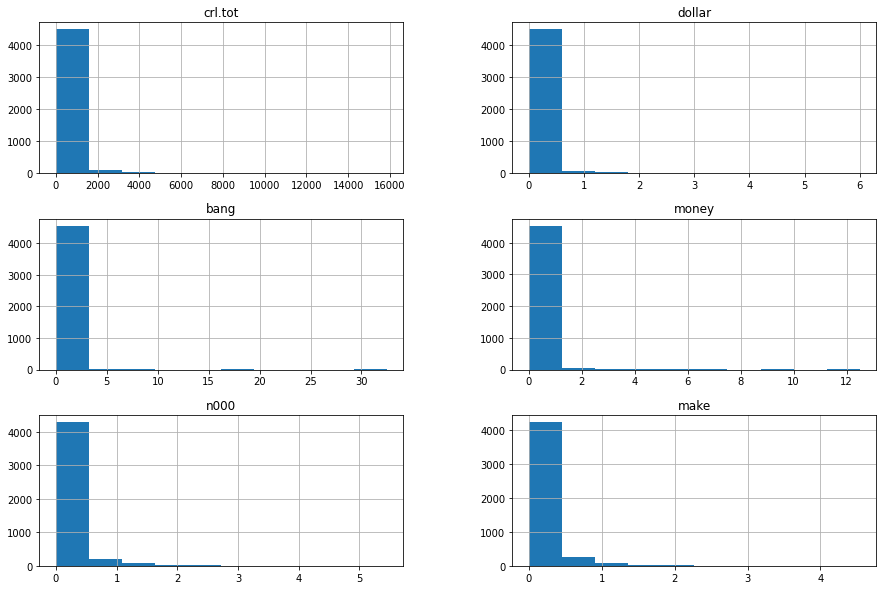

In [40]:
#visualize outliers
df.hist(figsize=(15,10))

4601
4463


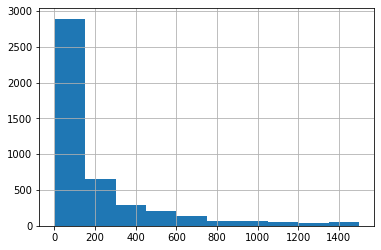

In [41]:
#removing outliers for length
print(len(df))
df = df.loc[df['crl.tot'] <= 1500]
print(len(df)) # removed 100+ outliers of "crl.tot"
df['crl.tot'].hist()

In [42]:
#removing outliers further
print(len(df))
df = df.loc[df['bang'] <= 5]
df = df.loc[df['money'] < 6]
print(len(df))

4463
4434


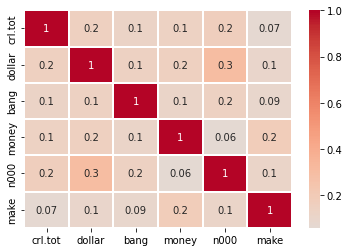

In [43]:
#correlation matrix
sns.heatmap(df.corr(),
            annot=True,
            center=0,
            cmap='coolwarm',
            fmt='.1g',
            linewidths=1)

> the color in the matrix is very like, which means there is no significant correlation between features

#Transform the dependent variable

In [44]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno_y
0,278,0.00,0.778,0.00,0.00,0.00,1
1,1028,0.18,0.372,0.43,0.43,0.21,1
3,191,0.00,0.137,0.00,0.00,0.00,1
4,191,0.00,0.135,0.00,0.00,0.00,1
5,54,0.00,0.000,0.00,0.00,0.00,1


In [45]:
#prepare X and y
y = df.yesno_y
# X = df.iloc[:,:-1]
X = df.drop(columns=['yesno_y'])
X = sm.add_constant(X)
X.head(2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1502)

#logistic regression

In [47]:
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 249.326529
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                yesno_y   No. Observations:                 3547
Model:                          Logit   Df Residuals:                     3540
Method:                           MLE   Df Model:                            6
Date:                Sun, 18 Sep 2022   Pseudo R-squ.:                     inf
Time:                        13:01:12   Log-Likelihood:            -8.8436e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0666      0.071    -28.975      0.000      -2.206      -1.927
crl.tot        0.0015      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


> The P value of "make" is 0.569 which is significantly higher than 0.05, which means it has no effect on the y

In [52]:
# Create the function to translate coefficient into probability
def logistic_reader(coefficient):
  probability = round((np.exp(coefficient) - 1) * 100, 1)
  print(probability)
  if probability > 0:
    print(f'the likelihood increases by {probability}%')
  elif probability ==0:
    print('no effect')
  else:
    print(f'the likelihood decreased by {probability}%')

In [53]:
logistic_reader(5)

14741.3
the likelihood increases by 14741.3%


#Assessing the model

In [55]:
#predictions
predictions = model.predict(X_test)
predictions

1989    0.114350
3567    0.100289
3030    0.114656
3201    0.137722
3971    0.195754
          ...   
2565    0.112984
3950    0.118852
1828    0.120121
576     0.999573
4214    0.223553
Length: 887, dtype: float64

In [57]:
#we need to define a threshold to let the prediction be compatible with the y
#we now choose 0.5, in practice you can adjust this value to fit your situation
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [58]:
# check if dataset is balanced
y_test.mean()

0.3573844419391206

In [60]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
fp

[[534  36]
 [ 89 228]]


36

# create kpi manually

In [68]:
# accuracy
accuracy = (tn + tp) / (tn + tp + fn + fp) * 100
print(f'accuracy: {accuracy}')

# F1 score
f1 = 2 * tp / (2*tp + fp + fn) * 100
print(f'f1 score is: {f1}')

# specificity
spec = tn / (tn + fp) * 100
print(f'specificity is {spec}')

#sensitivity
sens = tp / (tp + fn) * 100
print(f'sensitivity is {sens}')

accuracy: 85.9075535512965
f1 score is: 78.48537005163512
specificity is 93.6842105263158
sensitivity is 71.92429022082018


In [69]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       570
           1       0.86      0.72      0.78       317

    accuracy                           0.86       887
   macro avg       0.86      0.83      0.84       887
weighted avg       0.86      0.86      0.86       887

